# Algering Forest Fires - Linear Regression, Ridge, Lasso, Hyperparmeter tuning and deploying.

In [179]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle warnings
import warnings
warnings.filterwarnings("ignore")

## load the data

In [180]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
print('Data is upladed successfully!!!')
df

Data is upladed successfully!!!


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [181]:
# Basic Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [182]:
df.tail()
print('The data consist of {} rows and  {} columns'.format(*df.shape))

The data consist of 247 rows and  14 columns


### Data Cleaning

In [183]:
df[df.isnull().any(axis=1)]   # shows index numder with missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [184]:
# Chnage object data to Int and also insert new var `REGION` combineng data from both region
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [185]:
df[['Region']]=df[['Region']].astype(int)
df.tail()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [186]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [187]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [188]:
# removed the second header columns
print(df[df['day']=='day'])
df = df.drop(122).reset_index(drop=True)
df.iloc[122]

     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI    Classes  Region  
122  FWI  Classes         1  


day                      1
month                    6
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [189]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [190]:
# Fix spaces in column names
df.columns=df.columns.str.strip()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [191]:
# Convert object into integers
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


#### Convert object to float data type

In [193]:
object = [features for features in df.columns if df[features].dtypes=='O']

In [194]:
for i in object:
    if i !='Classes':
        df[i]=df[i].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


# Save as `csv` the cleaned data

In [195]:
# save to csv
df.to_csv('cleaned_data.csv', index=False)
print('Data is stored Successfully!!!')

Data is stored Successfully!!!


# EDA

In [196]:
df = pd.read_csv('cleaned_data.csv')
print('Read `Cleaned Data` Succesfully!!!')
df.head()

Read `Cleaned Data` Succesfully!!!


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [197]:
# modify `Classes` features into category

df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Here we we various version for fir and not fire with spaces.  
we need to tackle it and conver into unique values
- **way 1** : using `str.strip()` remove allthe spaces and we get the uniques values
- **way 2** : using the `str.contain` directly when converting values into categories

In [198]:
# using `str.strip()`
# df['Classes'] = df['Classes'].str.strip()
# df['Classes'].unique()
# df['Classes'].value_counts()

# using `str.constains`
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [199]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [200]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


### Graphs

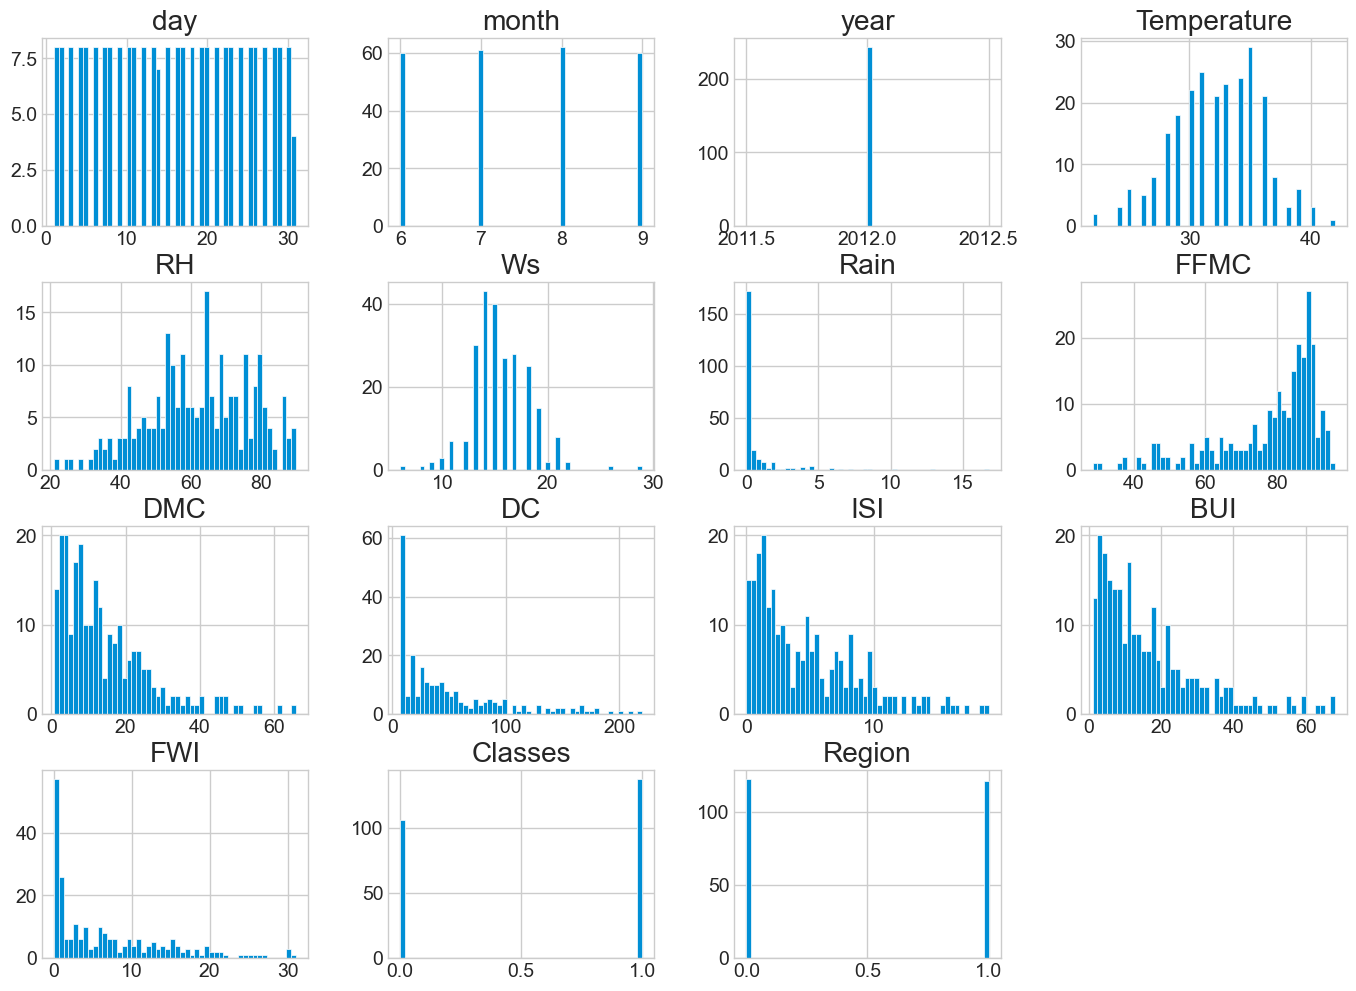

In [201]:
plt.style.use('seaborn-v0_8-whitegrid')
df.hist(bins=50, figsize=(15,10))
plt.title('Histogram of Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

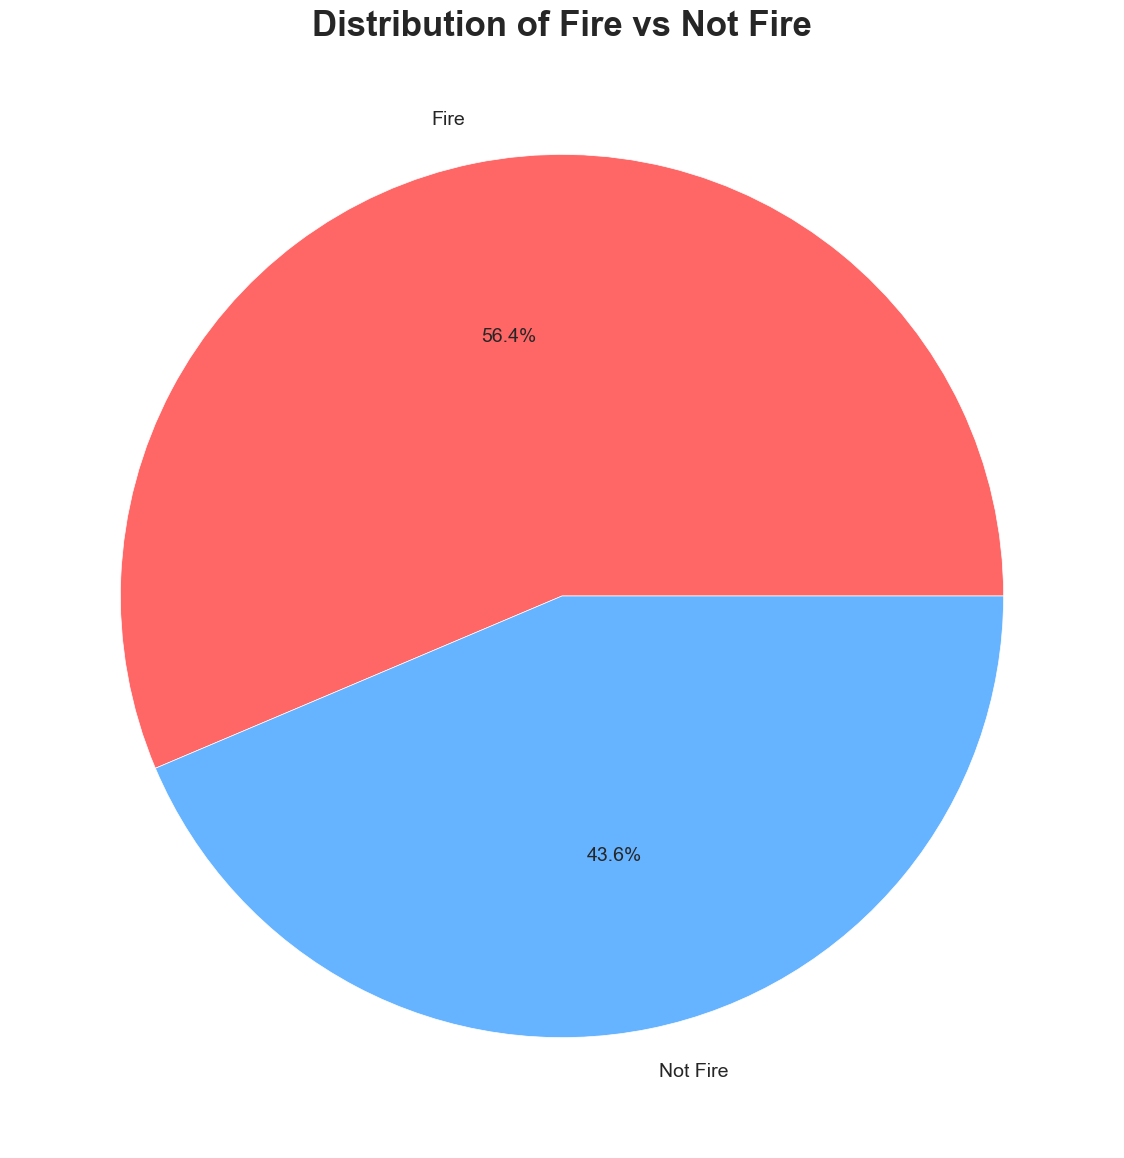

----------------------------------------


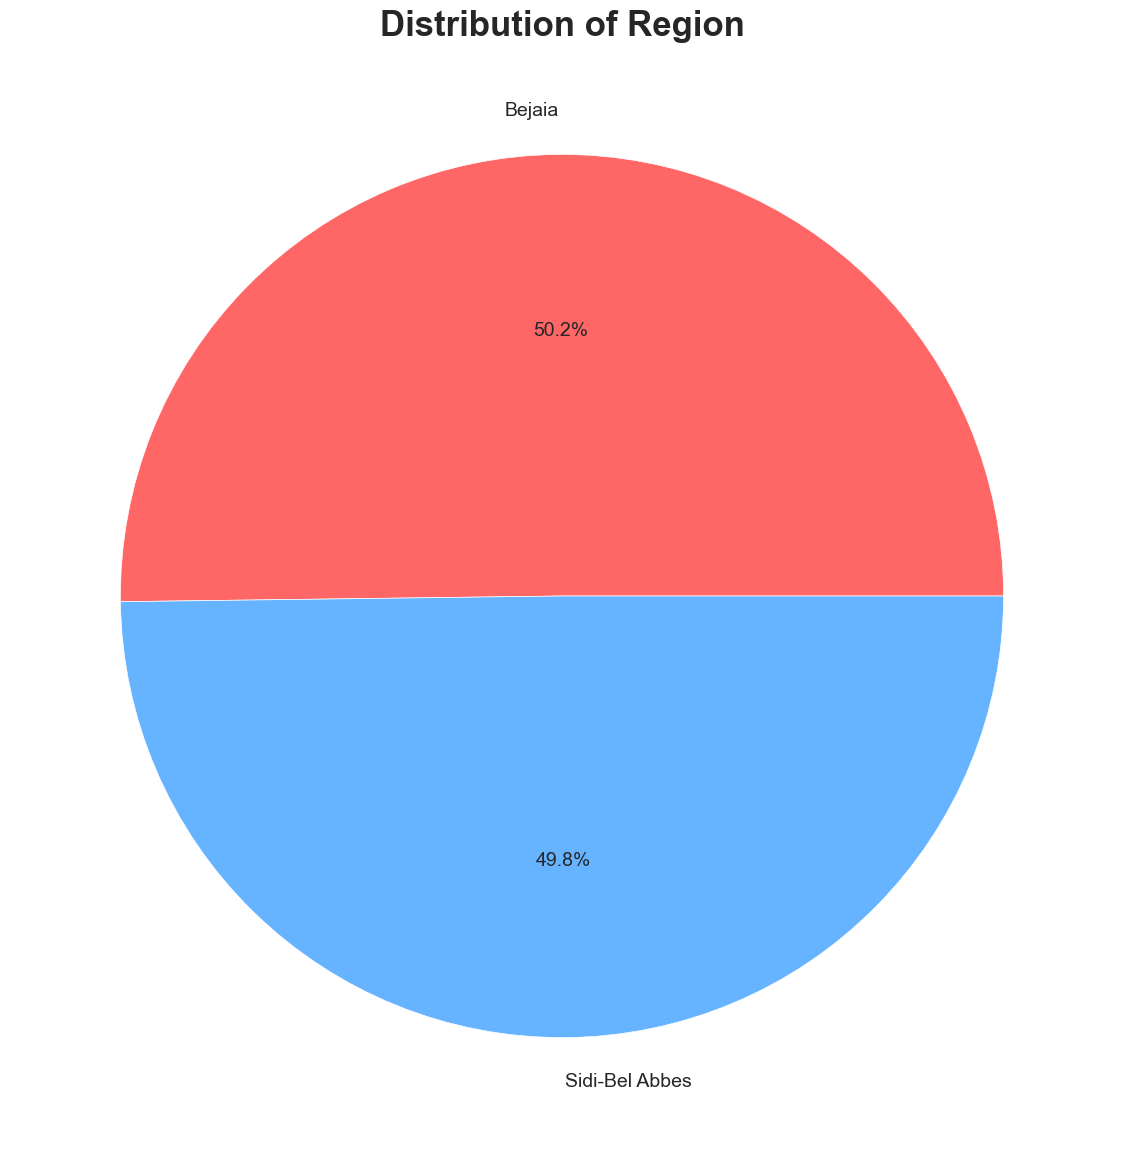

In [202]:
# Pie charts

# Classes
class_label=['Fire', 'Not Fire']
classes = df['Classes'].value_counts(normalize=True)*100

plt.figure(figsize=(15,12))
plt.pie(classes,labels=class_label, autopct='%1.1f%%', colors=['#ff6666', '#66b3ff'])
plt.title('Distribution of Fire vs Not Fire', fontsize=25, weight='bold')
plt.show()

print('-'*40)

# Classes
reg_label=['Bejaia', 'Sidi-Bel Abbes']
region = df['Region'].value_counts(normalize=True)*100

plt.figure(figsize=(15,12))
plt.pie(region,labels=reg_label, autopct='%1.1f%%', colors=['#ff6666', '#66b3ff'])
plt.title('Distribution of Region', fontsize=25, weight='bold')
plt.show()


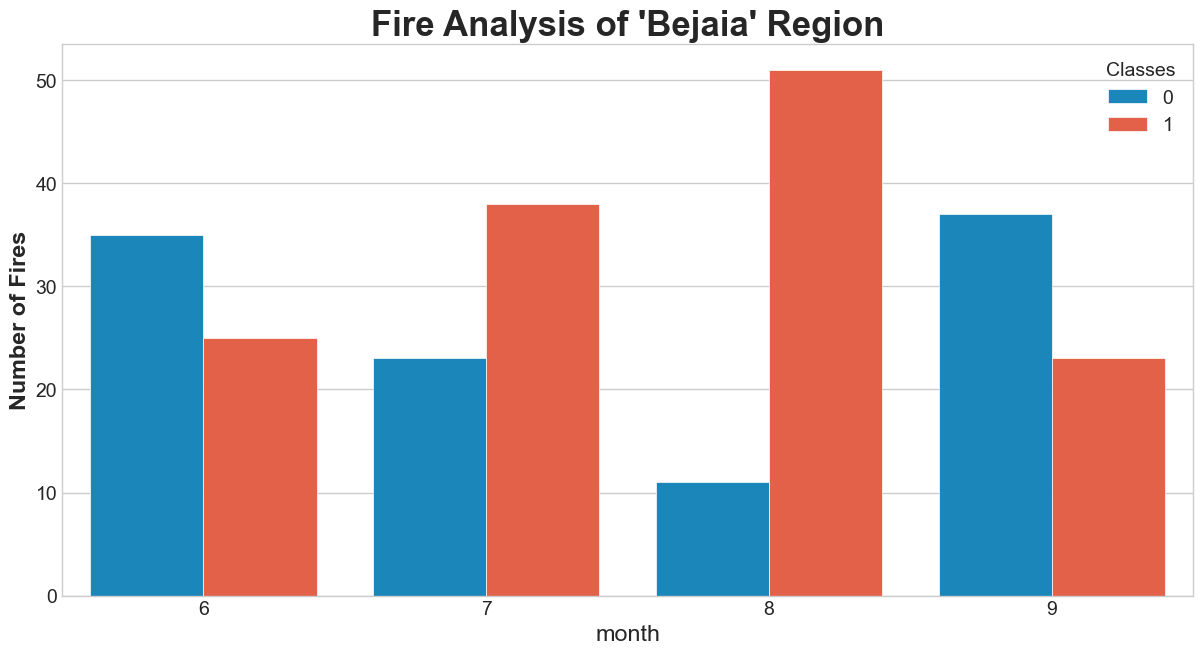

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


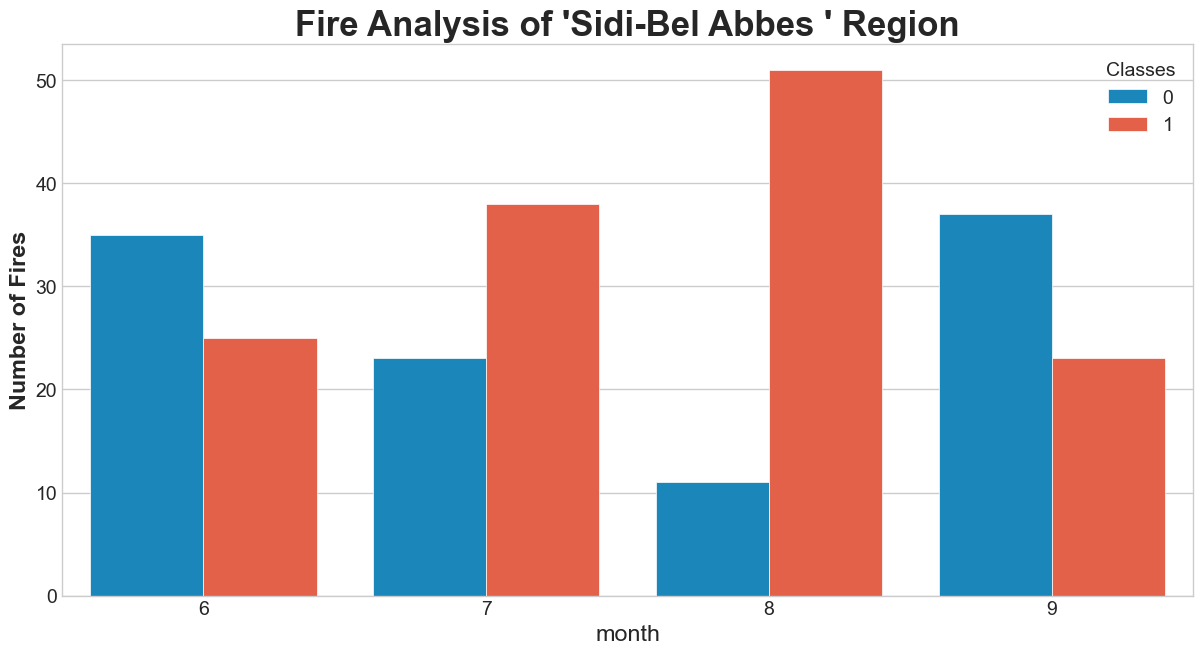

In [207]:
## monthly fire analysis

# Filter the DataFrame to get data for the 'Bejaia' region (Region == 0)
dftemp = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel("Number of Fires", weight='bold')
plt.title("Fire Analysis of 'Bejaia' Region", weight='bold', fontsize=25)
plt.show()

print('=*'*75)
# Filter the DataFrame to get data for the 'Bejaia' region (Region == 0)
dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel("Number of Fires", weight='bold')
plt.title("Fire Analysis of 'Sidi-Bel Abbes ' Region", weight='bold', fontsize=25)
plt.show()

- Majority of `fires` are in 'AUGUST' month for both regions.
* `September` has the lowest fires aamong the all months

### We drop `day,month year` from the columns

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0


<Axes: >

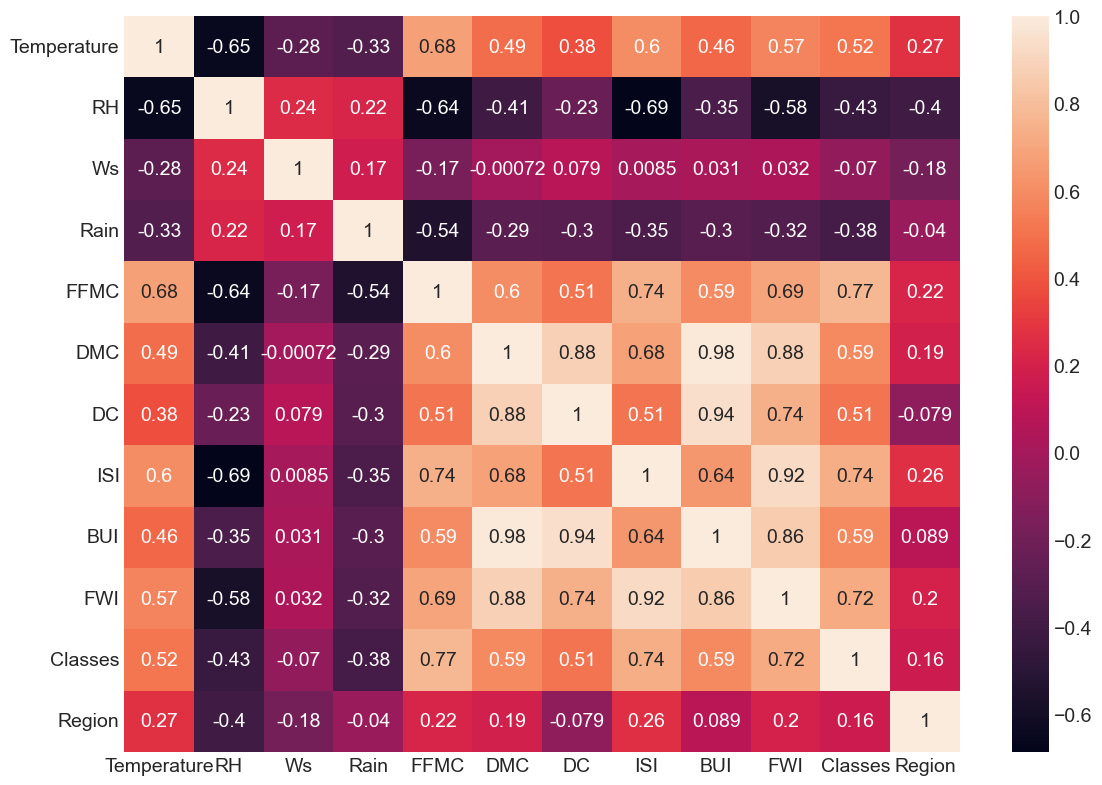

In [204]:
df_copy = df.drop(columns=['day','month','year'])
print(df_copy.head())

# check for correlation
cor = df_copy.corr()
cor

# plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True)

Text(0, 0.5, 'Frequency')

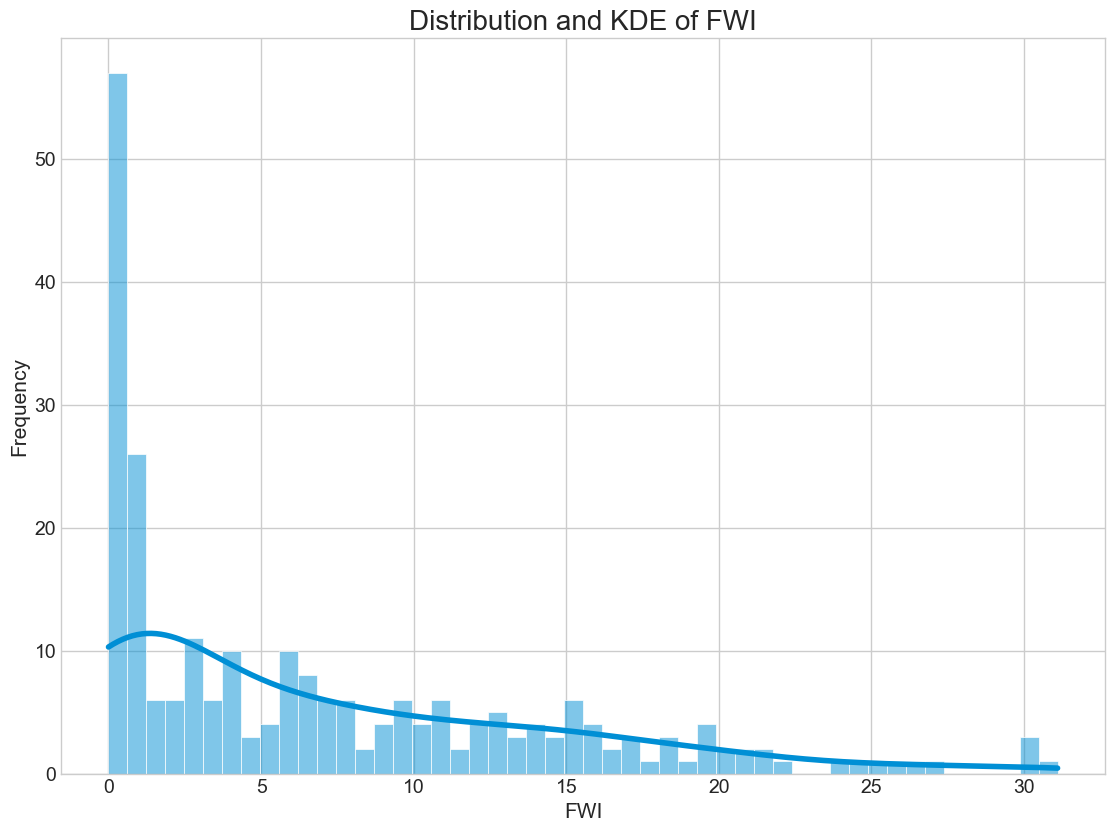

In [205]:
# Check the distibution for `FWI`
plt.figure(figsize=(12,8))
sns.histplot(df['FWI'], kde=True, bins=50)

# Add labels and title
plt.title('Distribution and KDE of FWI', fontsize=20)
plt.xlabel('FWI', fontsize=15)
plt.ylabel('Frequency', fontsize=15)


Text(0, 0.5, 'Frequency')

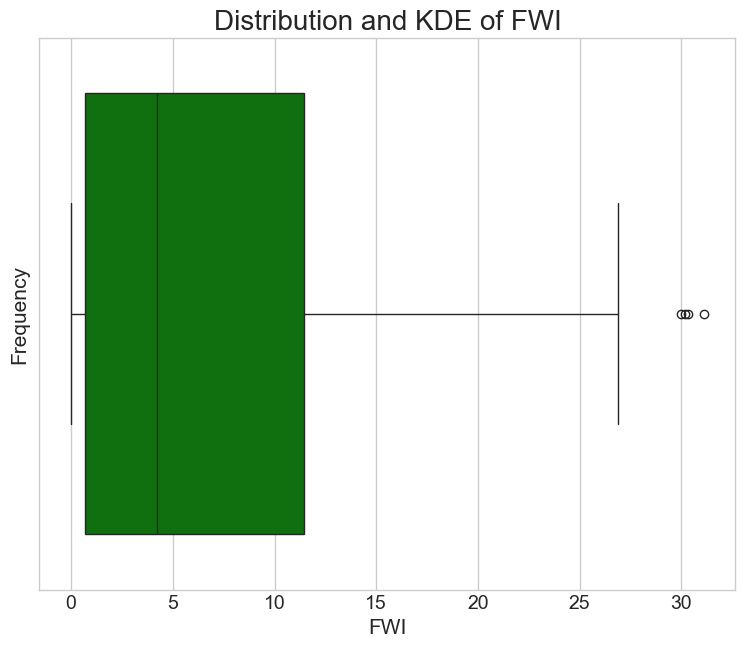

In [206]:
# BOXPLOT

plt.figure(figsize=(8,6))
sns.boxplot(df['FWI'], color='green', orient='h' )
plt.title('Distribution and KDE of FWI', fontsize=20)
plt.xlabel('FWI', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

In [210]:
# save to csv
df_copy.to_csv('final_data.csv', index=False)
print('Final data is stored Successfully!!!')

Final data is stored Successfully!!!
